## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets

## Functions

In [2]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    y = 1/(1 + np.exp(-z))
    return y

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot((1 - labels), np.log(1 - predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = - (cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = len(features.columns)# number of features

    #1 - Get Predictions
    predictions = predict(features, weights)
    

    gradient = np.dot((predictions - labels) , features)# Write down the gradient of the cost

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr * gradient# Write down the update rule here

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [3]:
data = sklearn.datasets.make_classification(n_samples=1000, n_classes=3,n_clusters_per_class=1, n_features= 2,n_informative=2, n_redundant=0, n_repeated=0)

In [4]:
X = pd.DataFrame(data[0],columns=["a","b"])#,"c","d"])# Features
y = data[1]# Target labels

In [5]:
X

,a,b
0,-1.759460,-0.996014
1,0.276269,-0.574792
2,1.536210,-1.327120
3,0.556688,-0.408172
4,-0.137167,1.809746
...,...,...
995,0.226635,0.573709
996,1.007382,-0.163162
997,-1.545196,-1.797235
998,-1.543888,-1.619435


In [7]:
y

array([2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1,
       1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1,

In [8]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 42)

In [13]:
x_test.shape

(200, 2)

In [12]:
# Initialize the weights
wts = np.random.normal(0, 1, 2)

# Training
optimal_wts, loss = train(x_train, y_train, wts, 1e-5, 1000)

iter: 0 cost: 1.3037937084912272
iter: 1 cost: 1.2979212336657913
iter: 2 cost: 1.2920619999532956
iter: 3 cost: 1.2862160514809884
iter: 4 cost: 1.2803834321730567
iter: 5 cost: 1.2745641857442909
iter: 6 cost: 1.2687583556936954
iter: 7 cost: 1.262965985298048
iter: 8 cost: 1.2571871176054017
iter: 9 cost: 1.2514217954285458
iter: 10 cost: 1.2456700613384089
iter: 11 cost: 1.2399319576574166
iter: 12 cost: 1.2342075264528025
iter: 13 cost: 1.228496809529871
iter: 14 cost: 1.2227998484252172
iter: 15 cost: 1.217116684399901
iter: 16 cost: 1.2114473584325784
iter: 17 cost: 1.205791911212595
iter: 18 cost: 1.2001503831330356
iter: 19 cost: 1.1945228142837363
iter: 20 cost: 1.1889092444442628
iter: 21 cost: 1.183309713076848
iter: 22 cost: 1.1777242593193025
iter: 23 cost: 1.1721529219778852
iter: 24 cost: 1.1665957395201498
iter: 25 cost: 1.1610527500677594
iter: 26 cost: 1.1555239913892763
iter: 27 cost: 1.1500095008929232
iter: 28 cost: 1.1445093156193247
iter: 29 cost: 1.139023472234

iter: 751 cost: -0.4899535317261725
iter: 752 cost: -0.49108123532338027
iter: 753 cost: -0.49220818277776
iter: 754 cost: -0.49333437635041366
iter: 755 cost: -0.4944598182924585
iter: 756 cost: -0.4955845108450865
iter: 757 cost: -0.49670845623962334
iter: 758 cost: -0.49783165669758794
iter: 759 cost: -0.49895411443075
iter: 760 cost: -0.5000758316411887
iter: 761 cost: -0.5011968105213511
iter: 762 cost: -0.5023170532541084
iter: 763 cost: -0.5034365620128117
iter: 764 cost: -0.5045553389613516
iter: 765 cost: -0.5056733862542105
iter: 766 cost: -0.5067907060365208
iter: 767 cost: -0.5079073004441189
iter: 768 cost: -0.5090231716035992
iter: 769 cost: -0.5101383216323707
iter: 770 cost: -0.5112527526387087
iter: 771 cost: -0.5123664667218092
iter: 772 cost: -0.5134794659718422
iter: 773 cost: -0.5145917524700049
iter: 774 cost: -0.5157033282885727
iter: 775 cost: -0.5168141954909524
iter: 776 cost: -0.5179243561317328
iter: 777 cost: -0.5190338122567375
iter: 778 cost: -0.520142565

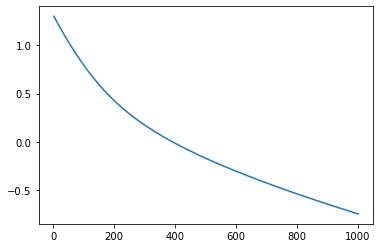

In [13]:
# Plot the loss against the number of epochs
plt.plot(np.arange(1, len(loss)+1, 1), loss)
plt.show()

In [14]:
predictions = []
for elem in predict(X, optimal_wts):
    predictions.append(decision_boundary(elem))

In [15]:
pd.value_counts(y)/np.sum(y)


2    0.336634
0    0.326733
1    0.326733
dtype: float64

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_6692/3092579685.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


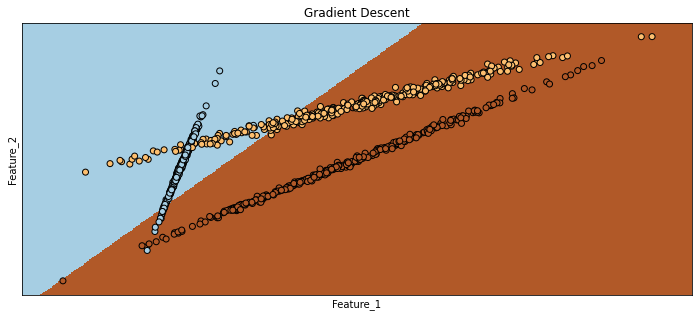

In [16]:
# Plot the decision boundary for two features. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['a'].min() - 0.5, X['a'].max() + 0.5
y_min, y_max = X['b'].min() - 0.5, X['b'].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
probs = predict(np.c_[xx.ravel(), yy.ravel()], optimal_wts[[0,1]])
mesh_preds = []
for elem in probs:
    mesh_preds.append(decision_boundary(elem))
Z = np.array(mesh_preds)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X['a'], X['b'], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title('Gradient Descent')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [18]:
# Accuracy
print("Accuracy using gradient descent: {}%".format(accuracy(predictions,y) * 100))

Accuracy using gradient descent: 56.099999999999994%


## Scikit-Learn module

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver= "lbfgs").fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver= "newton-cg").fit(x_train, y_train)

[[-2.95716782 -5.64702303]
 [-2.93716782 -5.64702303]
 [-2.91716782 -5.64702303]
 ...
 [ 5.20283218  4.01297697]
 [ 5.22283218  4.01297697]
 [ 5.24283218  4.01297697]]


C:\Users\Ujjwa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ujjwa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_6692/2468920659.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired)
C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_6692/2468920659.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify th

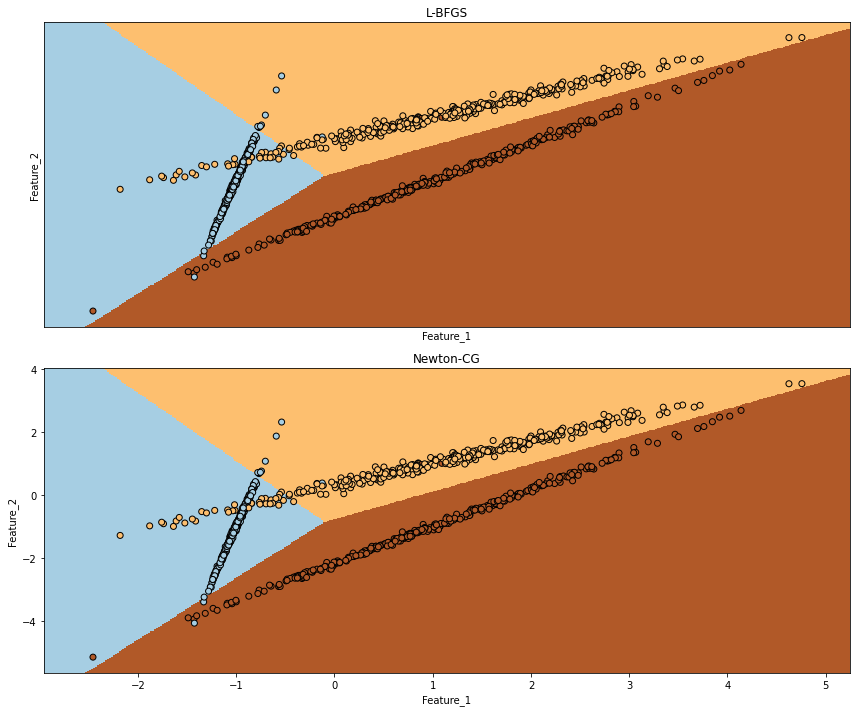

In [21]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train['a'].min() - 0.5, x_train['a'].max() + 0.5
y_min, y_max = x_train['b'].min() - 0.5, x_train['b'].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(np.c_[xx.ravel(), yy.ravel()])
Z_lbfgs = clf_lbfgs.predict(np.c_[xx.ravel(), yy.ravel()])
Z_newt = clf_newt.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z_lbfgs = Z_lbfgs.reshape(xx.shape)
Z_newt = Z_newt.reshape(xx.shape)

fig = plt.figure(figsize=(12, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.pcolormesh(xx, yy, Z_lbfgs, cmap=plt.cm.Paired)

# Plot also the training points
ax1.scatter(X['a'], X['b'], c=y, edgecolors="k", cmap=plt.cm.Paired)
ax1.set_xlabel("Feature_1")
ax1.set_ylabel("Feature_2")

ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_title('L-BFGS')
ax1.set_xticks(())
ax1.set_yticks(())

ax2 = plt.subplot(2, 1, 2)
ax2.pcolormesh(xx, yy, Z_newt, cmap=plt.cm.Paired)

# Plot also the training points
ax2.scatter(X['a'], X['b'], c=y, edgecolors="k", cmap=plt.cm.Paired)
ax2.set_xlabel("Feature_1")
ax2.set_ylabel("Feature_2")

ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_title('Newton-CG')
ax1.set_xticks(())
ax1.set_yticks(())
plt.tight_layout()
plt.show()

In [22]:
# Accuracy
print("Accuracy using L-BFGS: {}%".format(accuracy(clf_lbfgs.predict(x_test), y_test) * 100))
print('\n')
print("Accuracy using Newton-CG: {}%".format(accuracy(clf_newt.predict(x_test), y_test) * 100))

Accuracy using L-BFGS: 95.0%


Accuracy using Newton-CG: 95.0%
